In [34]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

folder1_path = "covid"
folder2_path = "normal"


image_size = (224, 224)

data = []
labels = []


def one_hot(data):
    a= list(set(data))
    ohe = np.zeros((len(data),len(set(data))))
    for i in range(len(data)):
        ind = a.index(data[i])
        ohe[i][ind] = 1
    
    return ohe



for filename in os.listdir(folder1_path):
    img = cv2.imread(os.path.join(folder1_path, filename))
    if img is not None:
        img = cv2.resize(img, image_size) if image_size else img
        data.append(img)
        labels.append(0)  

for filename in os.listdir(folder2_path):
    img = cv2.imread(os.path.join(folder2_path, filename))
    if img is not None:
        img = cv2.resize(img, image_size) if image_size else img
        data.append(img)
        labels.append(1)  

data = np.array(data)
labels = one_hot(labels)
labels = np.array(labels)
data = data/255.0

train_data, r_data, train_labels, r_labels = train_test_split(data, labels, test_size=0.3, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(r_data, r_labels, test_size=0.5, random_state=42)


# Print the shapes of the resulting datasets
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("val data shape:", val_data.shape)
print("val labels shape:", val_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)


Training data shape: (842, 224, 224, 3)
Training labels shape: (842, 2)
val data shape: (181, 224, 224, 3)
val labels shape: (181, 2)
Test data shape: (181, 224, 224, 3)
Test labels shape: (181, 2)


In [35]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [36]:
model_vgg = tf.keras.applications.vgg16.VGG16()

In [37]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [38]:
model = Sequential()
for i in model_vgg.layers[:-1]:
    model.add(i)

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [40]:
for i in model.layers:
    i.trainable = False

In [41]:
model.add(Dense(units = 2, activation = "softmax"))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [44]:
history = model.fit(train_data, train_labels, epochs=50, batch_size=64, validation_data=(val_data,val_labels), callbacks=[early_stopping])


Epoch 1/50
14/14 [==============================] - 118s 8s/step - loss: 0.7181 - accuracy: 0.6271 - val_loss: 0.4400 - val_accuracy: 0.9116
Epoch 2/50
14/14 [==============================] - 111s 8s/step - loss: 0.3968 - accuracy: 0.8527 - val_loss: 0.3723 - val_accuracy: 0.8066
Epoch 3/50
14/14 [==============================] - 112s 8s/step - loss: 0.2564 - accuracy: 0.9394 - val_loss: 0.2835 - val_accuracy: 0.8619
Epoch 4/50
14/14 [==============================] - 112s 8s/step - loss: 0.2079 - accuracy: 0.9489 - val_loss: 0.2192 - val_accuracy: 0.9116
Epoch 5/50
14/14 [==============================] - 112s 8s/step - loss: 0.1801 - accuracy: 0.9501 - val_loss: 0.1896 - val_accuracy: 0.9448
Epoch 6/50
14/14 [==============================] - 112s 8s/step - loss: 0.1680 - accuracy: 0.9572 - val_loss: 0.1780 - val_accuracy: 0.9392
Epoch 7/50
14/14 [==============================] - 112s 8s/step - loss: 0.1517 - accuracy: 0.9620 - val_loss: 0.1671 - val_accuracy: 0.9392
Epoch 8/50
14

In [45]:
 # Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


6/6 [==============================] - 21s 3s/step - loss: 0.0544 - accuracy: 0.9834
Test accuracy: 0.9834254384040833


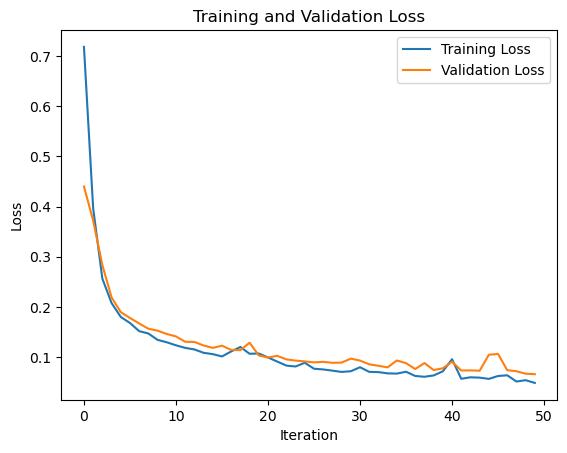

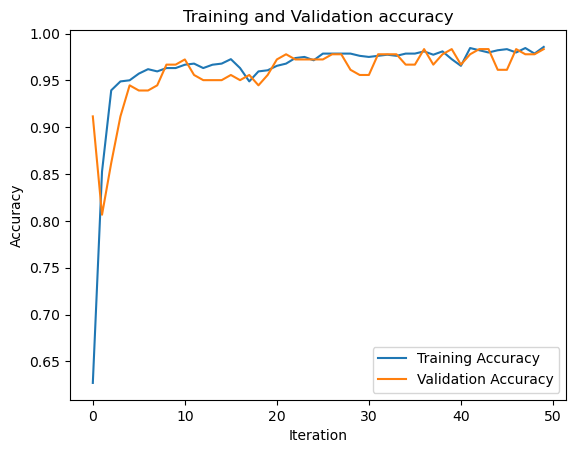

In [46]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()




plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
